In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov
import RuleQuality as RQ

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [2]:
#get list of client rules sorted by count
popSize = 10
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
# clientFilename = "../Data/Sepsis/Best/"

# ldpFilename = "../Results/TEST/ICU_Base_PRIV.csv"
ldpFilename = "../Results/TEST/ICU_Base_TEST.csv"
# ldpFilename = "../Results/Sepsis_Base_TEST.csv"

# ldpFilename = "../Results/ICU_Base_TEST_2.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8


,Rule,Rule Count,Percent of Population
53,"((MET >= 0.000) U[0,0] (death = 0.000))",17,1.0
56,"F[0,0]((BLOOD_UREA_NITROGEN <= 0.000 & CREATIN...",13,1.0
57,"G[0,0]((n_evts <= 0.000 -> LOS >= 0.000))",12,1.0
47,"G[0,0]((hr >= 0.000 & Pulse >= 0.000))",3,0.3
172,"((af >= 0.000) U[0,0] (direct >= 0.000))",3,0.3
...,...,...,...
188,"F[0,0]((HEMOGLOBIN <= 0.000 & O2_Flow <= 0.000))",1,0.1
187,"F[0,0]((dfa >= 0.000 & Mort >= 0.000))",1,0.1
186,"((O2_Flow <= 0.000) U[0,0] (PLATELET_COUNT >= ...",1,0.1
185,"((MET >= 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN...",1,0.1


In [4]:
clientDF.to_csv("Client Rules.csv")

## Load LDP Ruleset

In [5]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
181,"((s24_hr > 0.000) U[0,0] (POTASSIUM < 0.000))",1.0
149,"G[0,0]((BLOOD_UREA_NITROGEN = 0.000 | ICU_Pt_D...",1.0
139,"((death = 0.000) U[0,0] (n_edrk < 0.000))",1.0
527,"F[0,0]((direct > 0.000 & death = 0.000))",1.0
526,"((MAGNESIUM > 0.000) U[0,0] (death > 0.000))",1.0
...,...,...
233,"G[0,0]((Resp = 0.000 | Mort = 0.000))",0.5
232,"((lds > 0.000) U[0,0] (n_edrk > 0.000))",0.5
231,"((af = 0.000) U[0,0] (dfa = 0.000))",0.5
230,"F[0,0]((ICU_Pt_Days > 0.000 & Mort = 0.000))",0.5


## Get Table of Structure Counts - Count of rules above threshold

In [15]:
covDF, countDF, clientTrees = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")

LDP RULE NOT FOUND G[0,0]((ICU_Pt_Days = 0.000 & n_evts < 0.000))
LDP RULE NOT FOUND ((s8_edrk = 0.000) U[0,0] (s24_hr < 0.000))
LDP RULE NOT FOUND F[0,0]((death < 0.000 & ALBUMIN < 0.000))
LDP RULE NOT FOUND F[0,0]((n_evts = 0.000 & MAGNESIUM = 0.000))
LDP RULE NOT FOUND ((Glasgow_Coma_Scale_Total < 0.000) U[0,0] (lds > 0.000))
LDP RULE NOT FOUND ((CHLORIDE = 0.000) U[0,0] (Pulse = 0.000))
LDP RULE NOT FOUND ((s2_edrk = 0.000) U[0,0] (PLATELET_COUNT = 0.000))
LDP RULE NOT FOUND G[0,0]((s24_edrk > 0.000 | edrk > 0.000))
LDP RULE NOT FOUND ((SBP > 0.000) U[0,0] (CREATININE = 0.000))
LDP RULE NOT FOUND ((direct > 0.000) U[0,0] (death > 0.000))
LDP RULE NOT FOUND F[0,0]((CHLORIDE < 0.000 & s8_hr < 0.000))
LDP RULE NOT FOUND G[0,0]((PHOSPHORUS = 0.000 -> Temp < 0.000))
LDP RULE NOT FOUND G[0,0]((LOS > 0.000 -> WHITE_BLOOD_CELL_COUNT > 0.000))
LDP RULE NOT FOUND F[0,0]((LOS = 0.000 & PHOSPHORUS > 0.000))
LDP RULE NOT FOUND F[0,0]((O2_Flow = 0.000 & BLOOD_UREA_NITROGEN < 0.000))
LDP RULE NOT

LDP RULE NOT FOUND F[0,0]((GLUCOSE = 0.000 & Temp > 0.000))
LDP RULE NOT FOUND ((POTASSIUM > 0.000) U[0,0] (lds = 0.000))
LDP RULE NOT FOUND ((n_evts < 0.000) U[0,0] (death > 0.000))
LDP RULE NOT FOUND ((MET > 0.000) U[0,0] (Resp = 0.000))
LDP RULE NOT FOUND ((dfa < 0.000) U[0,0] (direct = 0.000))
LDP RULE NOT FOUND F[0,0]((ICU_Pt_Days > 0.000 & Temp < 0.000))
LDP RULE NOT FOUND G[0,0]((BLOOD_UREA_NITROGEN > 0.000 -> WHITE_BLOOD_CELL_COUNT > 0.000))
LDP RULE NOT FOUND F[0,0]((ICU_Pt_Days > 0.000 & PHOSPHORUS > 0.000))
LDP RULE NOT FOUND ((direct < 0.000) U[0,0] (s24_hr = 0.000))
LDP RULE NOT FOUND ((Pulse < 0.000) U[0,0] (s24_hr = 0.000))
LDP RULE NOT FOUND G[0,0]((Glasgow_Coma_Scale_Total > 0.000 & Sgy > 0.000))
LDP RULE NOT FOUND ((CREATININE = 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN_TIME < 0.000))
LDP RULE NOT FOUND F[0,0]((LOS > 0.000 & ICU_Pt_Days < 0.000))
LDP RULE NOT FOUND F[0,0]((Mort = 0.000 & CREATININE = 0.000))
LDP RULE NOT FOUND ((CREATININE = 0.000) U[0,0] (n_edrk = 0.000)

LDP RULE NOT FOUND ((n_evts = 0.000) U[0,0] (s2_hr = 0.000))
LDP RULE NOT FOUND G[0,0]((hr < 0.000 | n_evts < 0.000))
LDP RULE NOT FOUND ((MAGNESIUM > 0.000) U[0,0] (ICU_Pt_Days = 0.000))
LDP RULE NOT FOUND F[0,0]((PCO2 = 0.000 & Temp > 0.000))
LDP RULE NOT FOUND ((SBP = 0.000) U[0,0] (s2_hr = 0.000))
LDP RULE NOT FOUND ((ALT_GPT > 0.000) U[0,0] (Resp > 0.000))
LDP RULE NOT FOUND ((n_evts = 0.000) U[0,0] (ICU_Pt_Days = 0.000))
LDP RULE NOT FOUND ((n_edrk < 0.000) U[0,0] (lds > 0.000))
LDP RULE NOT FOUND G[0,0]((LOS = 0.000 -> edrk = 0.000))
LDP RULE NOT FOUND ((dfa < 0.000) U[0,0] (LOS > 0.000))
LDP RULE NOT FOUND ((ICU_Pt_Days > 0.000) U[0,0] (BLOOD_UREA_NITROGEN = 0.000))
LDP RULE NOT FOUND ((Mort > 0.000) U[0,0] (s24_hr < 0.000))
LDP RULE NOT FOUND ((SBP < 0.000) U[0,0] (Resp = 0.000))
LDP RULE NOT FOUND G[0,0]((hr < 0.000 -> WHITE_BLOOD_CELL_COUNT > 0.000))
LDP RULE NOT FOUND ((ALKALINE_PHOSPHATASE > 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN_TIME = 0.000))
LDP RULE NOT FOUND G[0,0]((s8

LDP RULE NOT FOUND ((CREATININE > 0.000) U[0,0] (PLATELET_COUNT = 0.000))
LDP RULE NOT FOUND ((tte > 0.000) U[0,0] (tte < 0.000))
LDP RULE NOT FOUND F[0,0]((PARTIAL_THROMBOPLASTIN_TIME > 0.000 & TROPONIN_I < 0.000))
LDP RULE NOT FOUND ((LOS > 0.000) U[0,0] (Sgy = 0.000))
LDP RULE NOT FOUND ((PROTIME_INR = 0.000) U[0,0] (n_edrk = 0.000))
LDP RULE NOT FOUND G[0,0]((s24_edrk > 0.000 | GLUCOSE < 0.000))
LDP RULE NOT FOUND ((CALCIUM > 0.000) U[0,0] (cosen > 0.000))
LDP RULE NOT FOUND F[0,0]((y = 0.000 -> CHLORIDE > 0.000))
LDP RULE NOT FOUND ((ALKALINE_PHOSPHATASE > 0.000) U[0,0] (CHLORIDE = 0.000))
LDP RULE NOT FOUND F[0,0]((O2_Flow < 0.000 & cosen > 0.000))
LDP RULE NOT FOUND ((s2_edrk = 0.000) U[0,0] (s2_hr = 0.000))
LDP RULE NOT FOUND ((lds < 0.000) U[0,0] (OXYGEN_SATURATION = 0.000))
LDP RULE NOT FOUND F[0,0]((ICU_Pt_Days > 0.000 & TOTAL_BILIRUBIN > 0.000))
LDP RULE NOT FOUND G[0,0]((tte < 0.000 -> WHITE_BLOOD_CELL_COUNT = 0.000))
LDP RULE NOT FOUND ((Temp = 0.000) U[0,0] (WHITE_BLOOD_

In [16]:
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,553,94,512,0.155116


In [17]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"((O2_Flow < 0.000) U[0,0] (n_edrk = 0.000))","((n_edrk <= 0.000) U[0,0] (O2_Flow <= 0.000))",0.5,0.1
1,"((n_edrk = 0.000) U[0,0] (Mort > 0.000))","((Mort >= 0.000) U[0,0] (n_edrk <= 0.000))",0.5,0.1
2,"((y = 0.000) U[0,0] (ALBUMIN = 0.000))","((ALBUMIN >= 0.000) U[0,0] (y = 0.000))",0.5,0.1
3,"G[0,0]((s8_edrk > 0.000 -> Temp = 0.000))","G[0,0]((s8_edrk >= 0.000 -> Temp >= 0.000))",0.5,0.1
4,"F[0,0]((LOS = 0.000 & s8_edrk = 0.000))","F[0,0]((LOS >= 0.000 & s8_edrk >= 0.000))",0.5,0.1
...,...,...,...,...
89,"((O2_Flow = 0.000) U[0,0] (n_evts = 0.000))","((n_evts <= 0.000) U[0,0] (O2_Flow >= 0.000))",1.0,0.1
90,"((death = 0.000) U[0,0] (LOS > 0.000))","((death >= 0.000) U[0,0] (LOS >= 0.000))",0.5,0.1
91,"((n_evts > 0.000) U[0,0] (lds = 0.000))","((lds <= 0.000) U[0,0] (n_evts >= 0.000))",0.5,0.1
92,"((y = 0.000) U[0,0] (Pulse = 0.000))","((Pulse <= 0.000) U[0,0] (y = 0.000))",0.5,0.1


## Get number of unique structure types

In [18]:
structDF = cov.countUniqueStructuresNoVars(clientTrees, ldpTrees)

CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 | x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x < 0.000 -> x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x <= 0.000 | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 | x <= 0.000) & x >= 0.000))
LDP STRUCT NOT FOUND F[0,0]((x != 0.000 & x = 0.000))


In [19]:
structDF

,Total Client Structures,Found Structures,Non Structures,Precision
0,43,38,1,0.974359


## Compare LDP Rules Found vs the Percent Client Counts 

[autoreload of Coverage failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.3_1/Frameworks/Python.framework/Versions/3.8/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.3_1/Frameworks/Python.framework/Versions/3.8/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._

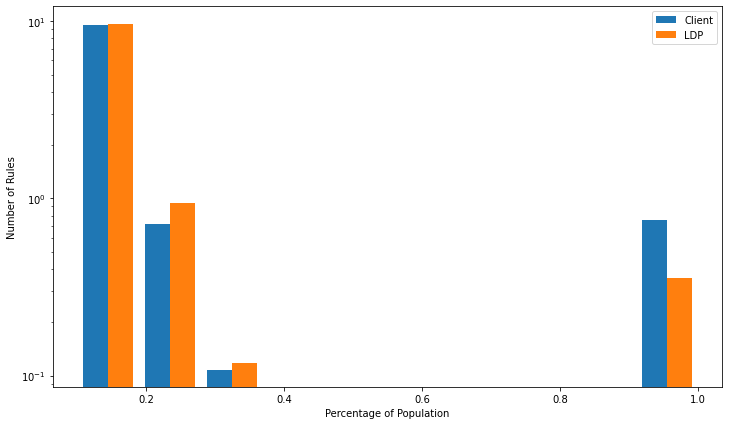

In [20]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()


In [7]:
base = pd.read_csv("../Results/Nonprivate/ICU/Base_CoverageSummaryDF.csv")
base

,Unnamed: 0,Queries,Total Client Rules,Percentage Found Rules,Found Rules,Non Rules,Rule Precision,Total Client Structures,Percentage Found Structures,Found Structures,Non Structures,Structure Precision
0,0,10000,553,0.994575,550,0,1.0,43,1.000000,43,0,1.0
1,1,9000,553,0.994575,550,0,1.0,43,1.000000,43,0,1.0
2,2,8000,553,0.985533,545,0,1.0,43,0.976744,42,0,1.0
3,3,7000,553,0.971067,537,0,1.0,43,0.976744,42,0,1.0
4,4,6000,553,0.936709,518,0,1.0,43,0.976744,42,0,1.0
5,5,5000,553,0.813743,450,0,1.0,43,0.976744,42,0,1.0
6,6,4000,553,0.701627,388,0,1.0,43,0.976744,42,0,1.0
7,7,3000,553,0.551537,305,0,1.0,43,0.976744,42,0,1.0
8,8,2000,553,0.439421,243,0,1.0,43,0.906977,39,0,1.0
9,9,1000,553,0.179024,99,0,1.0,43,0.581395,25,0,1.0


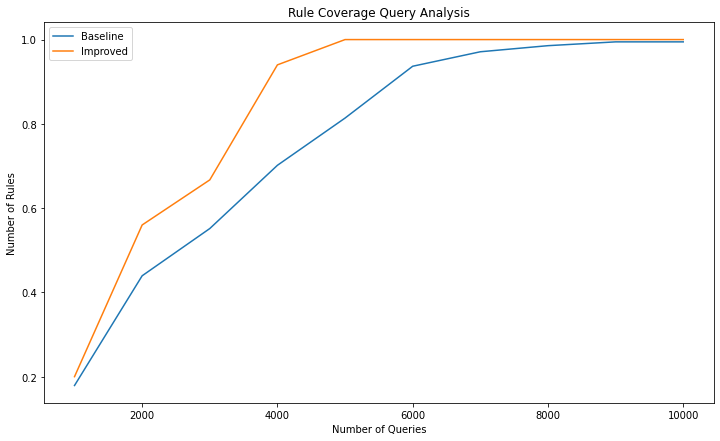

In [17]:
rules = base["Percentage Found Rules"]
queries = base["Queries"]
covRules = [1.0,1.0,1.0,1.0,1.0,1.0,0.94,0.667,0.56,0.2]

plt.figure(figsize=(12, 7))
plt.title("Rule Coverage Query Analysis")
# plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queries, covRules, label='Improved')
# plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

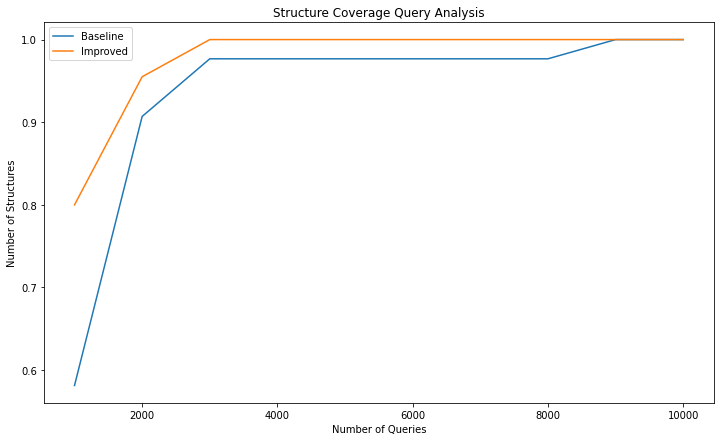

In [16]:
#Plot Structures
structs = base["Percentage Found Structures"]
covStructs = [1.0,1.0,1.0,1.0,1.0,1.0,1,1,0.955,0.8]

plt.figure(figsize=(12, 7))
plt.title("Structure Coverage Query Analysis")
# plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, structs, label='Baseline')
plt.plot(queries, covStructs, label='Improved')
# plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Structures")
plt.legend()

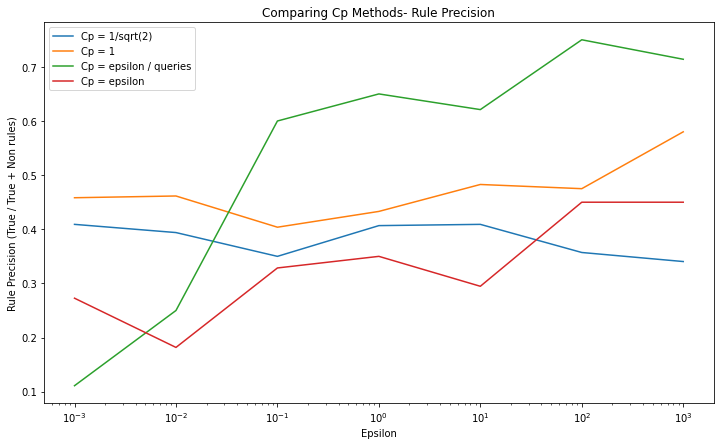

In [54]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [0.340425532,0.357142857,0.409090909,0.406779661,0.35,0.393939394,0.409090909]
one = [0.58, 0.475, 0.482758621, 0.433, 0.403846154, 0.4615, 0.45826087]
epsDivQueries = [0.714, 0.75, 0.6210526316, 0.65, 0.6, 0.25, 0.111111111]
epsOnly = [0.45, 0.45, 0.294736842, 0.35, 0.328571429, 0.181818182, 0.272727273]

# epsOnly = [0, 0, 0.394736842, 0.5, 0.428571429, 0.181818182, 0.272727273]

plt.figure(figsize=(12, 7))
plt.title("Comparing Cp Methods- Rule Precision")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Rule Precision (True / True + Non rules)")
plt.legend()

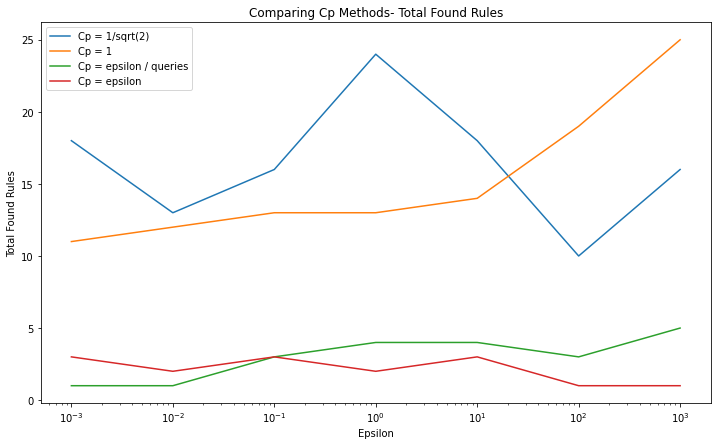

In [50]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [16, 10, 18, 24, 16, 13, 18]
one = [25, 19, 14, 13, 13, 12, 11]
epsDivQueries = [5, 3, 4, 4, 3, 1, 1]
epsOnly = [1, 1 ,3, 2, 3, 2, 3]


plt.figure(figsize=(12, 7))
plt.title("Comparing Cp Methods- Total Found Rules")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Total Found Rules")
plt.legend()

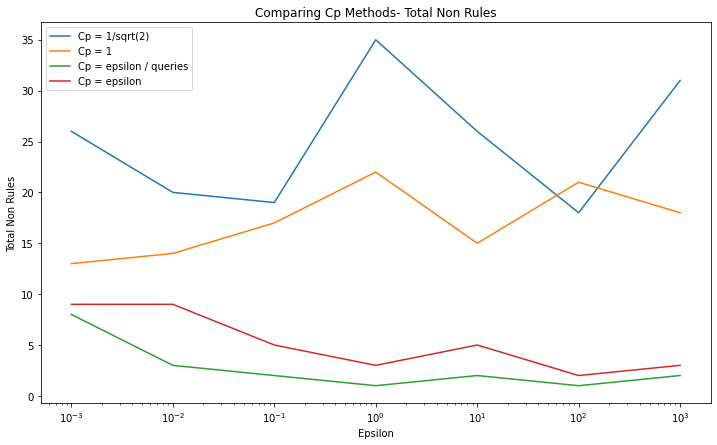

In [53]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [31, 18, 26, 35, 19, 20, 26]
one = [18, 21, 15, 22, 17, 14, 13] 
epsDivQueries = [2, 1, 2, 1, 2, 3, 8]
epsOnly = [3, 2, 5, 3, 5, 9, 9]


plt.figure(figsize=(12, 7))
plt.title("Comparing Cp Methods- Total Non Rules")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Total Non Rules")
plt.legend()

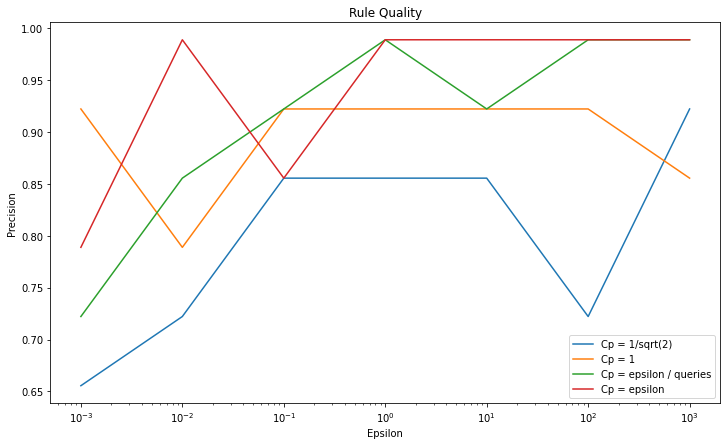

In [61]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [0.922222222,0.722222222,0.855555556,0.855555556,0.855555556,0.722222222,0.655555556]
one = [0.855555556,0.922222222,0.922222222,0.922222222,0.922222222,0.788888889,0.922222222] 
epsDivQueries = [0.988888889,0.988888889,0.922222222,0.988888889,0.922222222,0.855555556, 0.722222222]
epsOnly = [0.988888889,0.988888889,0.988888889,0.988888889, 0.855555556,0.988888889,0.788888889 ]


plt.figure(figsize=(12, 7))
plt.title("Rule Quality")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Precision")
plt.legend()

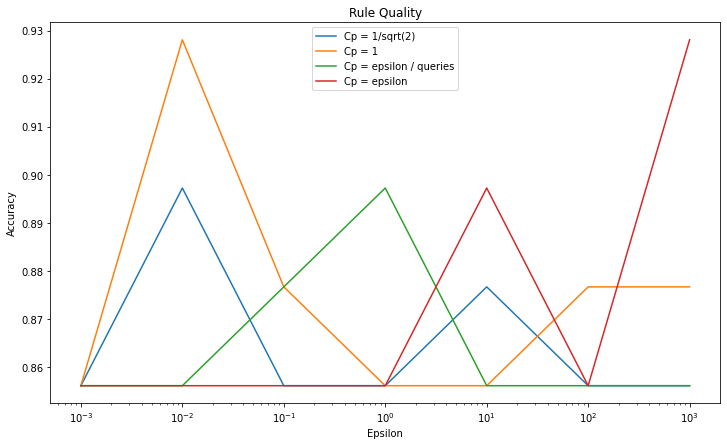

In [63]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [0.856164384,
0.856164384,
0.876712329,
0.856164384,
0.856164384,
0.897260274,
0.856164384]
one = [0.876712329,
0.876712329,
0.856164384,
0.856164384,
0.876712329,
0.928082192,
0.856164384] 
epsDivQueries = [0.856164384,
0.856164384,
0.856164384,
0.897260274,
0.876712329,
0.856164384,
0.856164384]
epsOnly = [0.928082192,
0.856164384,
0.897260274,
0.856164384,
0.856164384,
0.856164384,
0.856164384]


plt.figure(figsize=(12, 7))
plt.title("Rule Quality")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.legend()

In [5]:
df = pd.read_csv('../Results/Private/ICU/Base_CoverageSummaryDF.csv')
df

,Unnamed: 0,Queries,Epsilon,Total Client Rules,Percentage Found Rules,Found Rules,Non Rules,Rule Precision,Total Client Structures,Percentage Found Structures,Found Structures,Non Structures,Structure Precision
0,0,500,100,553,0.000000,0,0,0.0,43,0.000000,0,0,0.0
1,1,500,10,553,0.001808,1,0,1.0,43,0.093023,4,0,1.0
2,2,100,100,553,0.000000,0,0,0.0,43,0.000000,0,0,0.0
3,3,100,10,553,0.000000,0,0,0.0,43,0.000000,0,0,0.0


In [7]:
df['Epsilon']

0    100
1     10
2    100
3     10
Name: Epsilon, dtype: int64

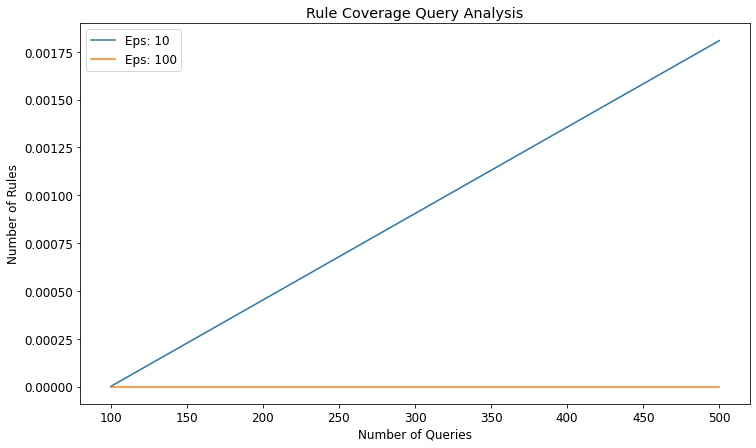

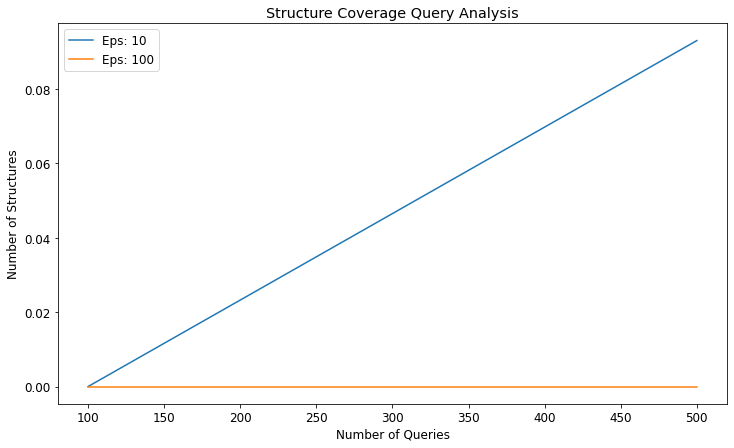

In [19]:
cov.plotQueryAnalysisPrivate(df, "test")

In [21]:
import RuleQuality as RQ
clientCM = pd.read_csv('../Results/NonPrivate/ICU/Base_Client_CM.csv')
clientCM

,Unnamed: 0,TP,TN,FP,FN,Actual Yes,Actual No,Predicted Yes,Predicted No,TPR/Sens,TNR/Spec,FPR,Precision,F1,Accuracy,MCR,BalancedAccuracy
0,0,750,0,126,0,750,126,876,0,1.0,0.0,1.0,0.856164,0.922509,0.856164,0.143836,0.5


In [24]:
df = pd.read_csv('../Results/Private/ICU/Base_RuleQualitySummaryDF.csv')
df

,Unnamed: 0,Queries,Epsilon,Precision,Accuracy,Patient Precision,Patient Accuracy
0,0.0,500,100,0.892857,0.897260,0.655556,0.666814
1,1.0,500,10,0.400000,0.500000,0.300000,0.450000
2,NaN,100,100,0.000000,0.143836,0.000000,0.011128
3,NaN,100,10,0.000000,0.030000,0.000000,0.001000


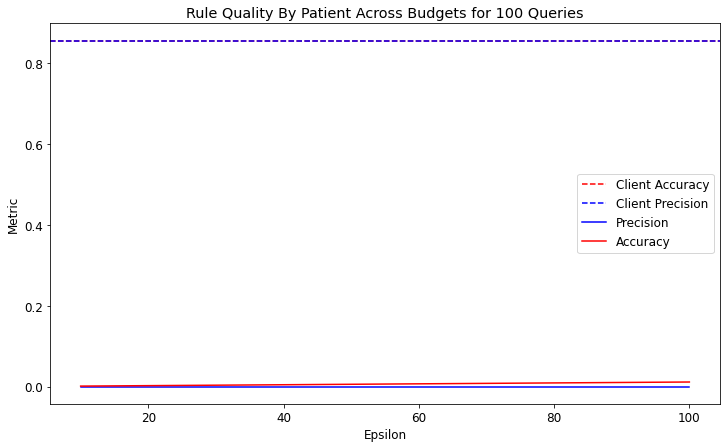

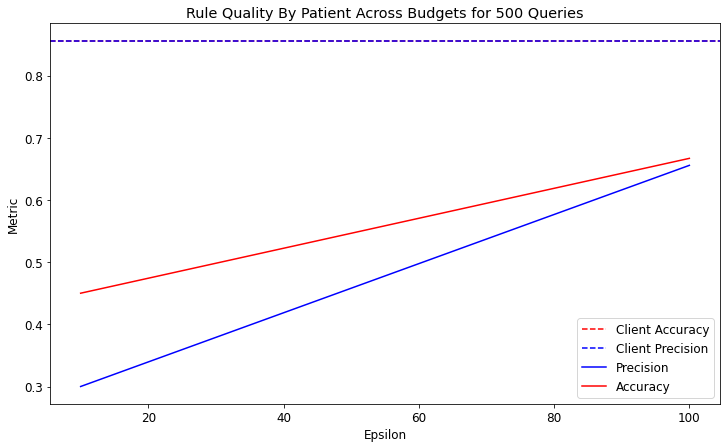

In [29]:
RQ.plotPrivatePatientCM(df, clientCM, "test")

## Complexity Analysis

In [40]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Coverage/CovSumSmol.csv')
df

In [ ]:
qDF= df
methods = sorted(list(set(qDF['Cp'])))
epsilons = sorted(list(set(qDF['Epsilon'])))

# plt.figure(figsize=(12, 7))
fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=len(methods))
# plt.title("Rule Summary for " + str(q) + " Queries")
ax_position = 0
for concept in methods:
    # idx = pd.IndexSlice
    # subset = df.loc[idx[[concept], :],
    #                 ['Found Rules', 'Non Rules']]
    subset = qDF.loc[qDF['Cp'] == concept][['Found Rules', 'Non Rules']]
    # print(subset.info())
    # subset = subset.groupby(
    #     subset.index.get_level_values('datetime').year).sum()

    # ax = subset.plot(kind="bar", stacked=True, colormap="Blues",ax=axes[ax_position])
    ax = subset.plot(kind="bar", stacked=True, ax=axes[ax_position])


    if concept == methods[0]:
        ax.set_ylabel("Total Rules")
    if concept == methods[-1]:
        ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

    ax.set_title("Cp: " + concept)
    ax.set_xlabel("Epsilon")
    # ax.set_title("Concept \"" + concept + "\"", fontsize=30, alpha=1.0)
    # ax.set_ylabel("Total Rules", fontsize=30)
    # ax.set_xlabel("Concept \"" + concept + "\"", fontsize=30, alpha=0.0)

    ax.set_ylim(0, 80)
    # ax.set_yticks(range(0, 9000, 1000))
    # ax.set_yticklabels(labels=range(0, 9000, 1000), rotation=0,
    #                    minor=False, fontsize=28)
    ax.set_xticklabels(labels=epsilons, rotation=0,minor=False)
    handles, labels = ax.get_legend_handles_labels()
    ax_position += 1

In [ ]:
#Plot percentage found rules
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Percentage Found Client Rules")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Percentage Found Rules']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Percentage Found Client Client Rules")
plt.xscale('log')
plt.legend()

In [ ]:
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Rule Precision")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Rule Precision']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Rule Precision")
plt.xscale('log')
plt.legend()

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Rule Quality/RuleQualitySumSmol.csv')

clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_CM.csv")
clientCM

In [ ]:
qDF = df
metric = "Accuracy"

plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='..', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='..', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

In [ ]:
qDF = df
metric = "Patient Precision"
clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_Patient_CM.csv")


plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='dotted', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='dotted', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

In [3]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Coverage/CovSumSmol.csv')
df

,Cp,Prune,Queries,Epsilon,Total Client Rules,Percentage Found Rules,Found Rules,Non Rules,Rule Precision,Total Client Structures,Percentage Found Structures,Found Structures,Non Structures,Structure Precision
0,basic,0.0001,1000,1000.000,553,0.052441,29,29,0.500000,43,0.186047,8,0,1.000000
1,basic,0.0001,1000,100.000,553,0.003617,2,3,0.400000,43,0.302326,13,0,1.000000
2,basic,0.0001,1000,10.000,553,0.021700,12,13,0.480000,43,0.162791,7,0,1.000000
3,basic,0.0001,1000,1.000,553,0.009042,5,7,0.416667,43,0.186047,8,0,1.000000
4,basic,0.0001,1000,0.100,553,0.001808,1,4,0.200000,43,0.186047,8,0,1.000000
5,basic,0.0001,1000,0.010,553,0.005425,3,13,0.187500,43,0.162791,7,0,1.000000
6,basic,0.0001,1000,0.001,553,0.001808,1,3,0.250000,43,0.093023,4,0,1.000000
7,beta,0.0001,1000,1000.000,553,0.063291,35,24,0.593220,43,0.186047,8,0,1.000000
8,beta,0.0001,1000,100.000,553,0.052441,29,21,0.580000,43,0.186047,8,0,1.000000
9,beta,0.0001,1000,10.000,553,0.047016,26,31,0.456140,43,0.348837,15,0,1.000000


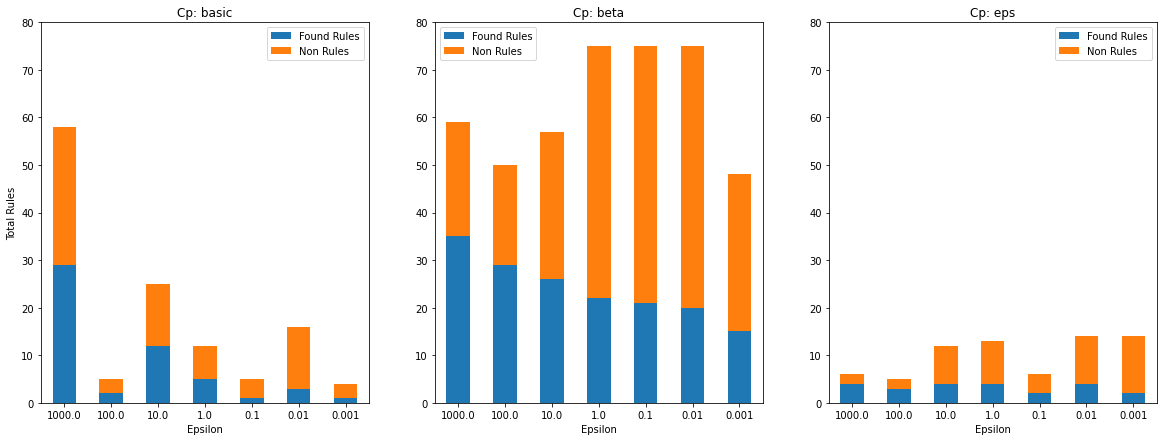

In [6]:
qDF= df
methods = sorted(list(set(qDF['Cp'])))
epsilons = sorted(list(set(qDF['Epsilon'])), reverse=True)


# plt.figure(figsize=(12, 7))
fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=len(methods))
# plt.title("Rule Summary for " + str(q) + " Queries")
ax_position = 0
for concept in methods:
    # idx = pd.IndexSlice
    # subset = df.loc[idx[[concept], :],
    #                 ['Found Rules', 'Non Rules']]
    subset = qDF.loc[qDF['Cp'] == concept][['Found Rules', 'Non Rules']]
    # print(subset.info())
    # subset = subset.groupby(
    #     subset.index.get_level_values('datetime').year).sum()

    # ax = subset.plot(kind="bar", stacked=True, colormap="Blues",ax=axes[ax_position])
    ax = subset.plot(kind="bar", stacked=True, ax=axes[ax_position])


    if concept == methods[0]:
        ax.set_ylabel("Total Rules")
    if concept == methods[-1]:
        ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

    ax.set_title("Cp: " + concept)
    ax.set_xlabel("Epsilon")
    # ax.set_title("Concept \"" + concept + "\"", fontsize=30, alpha=1.0)
    # ax.set_ylabel("Total Rules", fontsize=30)
    # ax.set_xlabel("Concept \"" + concept + "\"", fontsize=30, alpha=0.0)

    ax.set_ylim(0, 80)
    # ax.set_yticks(range(0, 9000, 1000))
    # ax.set_yticklabels(labels=range(0, 9000, 1000), rotation=0,
    #                    minor=False, fontsize=28)
    ax.set_xticklabels(labels=epsilons, rotation=0,minor=False)
    handles, labels = ax.get_legend_handles_labels()
    ax_position += 1

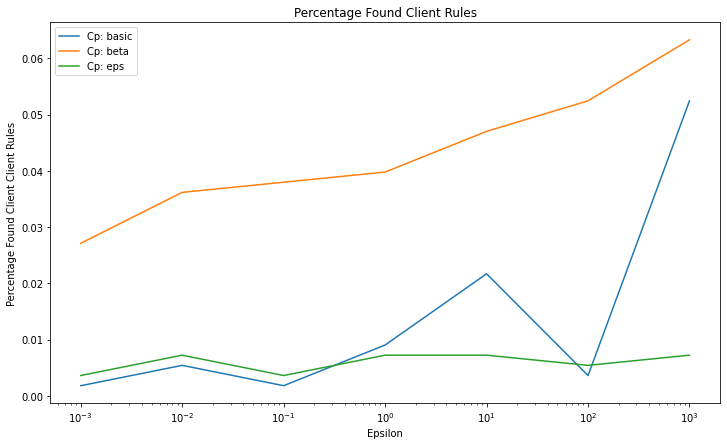

In [31]:
#Plot percentage found rules
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Percentage Found Client Rules")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Percentage Found Rules']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Percentage Found Client Client Rules")
plt.xscale('log')
plt.legend()

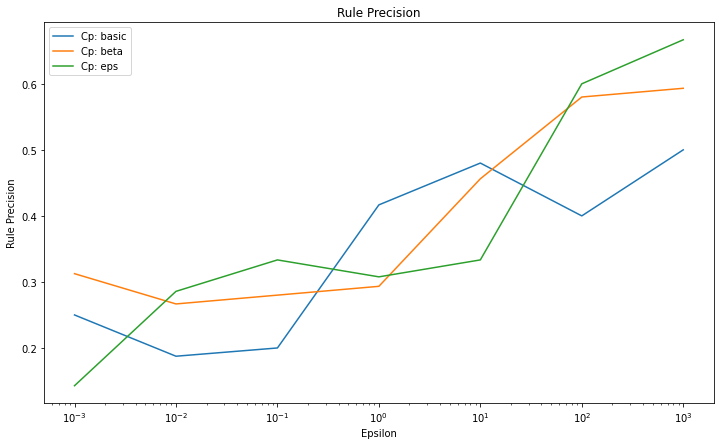

In [32]:
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Rule Precision")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Rule Precision']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Rule Precision")
plt.xscale('log')
plt.legend()

In [43]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Rule Quality/RuleQualitySumSmol.csv')

clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_CM.csv")
clientCM

,Unnamed: 0,TP,TN,FP,FN,Actual Yes,Actual No,Predicted Yes,Predicted No,TPR/Sens,TNR/Spec,FPR,Precision,F1,Accuracy,MCR,BalancedAccuracy
0,0,750,0,126,0,750,126,876,0,1.0,0.0,1.0,0.856164,0.922509,0.856164,0.143836,0.5


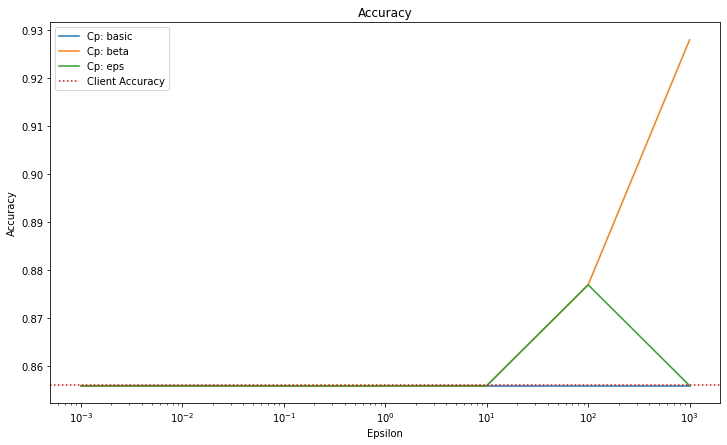

In [46]:
qDF = df
metric = "Accuracy"

plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='..', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='..', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

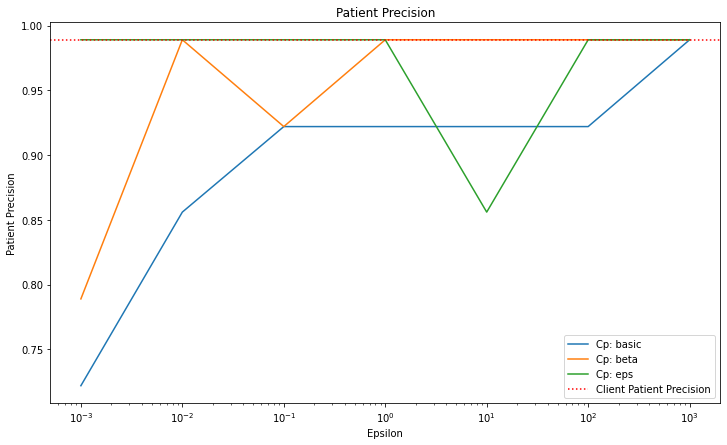

In [50]:
qDF = df
metric = "Patient Precision"
clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_Patient_CM.csv")


plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='dotted', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='dotted', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()